In [54]:
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#for model development
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
#for model evaluations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#for saving model
import joblib
#warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm

In [55]:
df = pd.read_csv('./SEWA_energy.csv',encoding='latin-1', sep=";")
df.sample(12)

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
276,04-Thg10,Monday,36 C,27 C,75%,35%,31 C,39%,1538.0,1899,1873.0
209,29-Thg7,Thursday,43 C,30 C,74%,16%,36 C,43%,1816.0,2386,2132.0
60,02-Thg3,Tuesday,33 C,16 C,76%,21%,21 C,46%,783.0,1055,940.0
43,13-Thg2,Saturday,25 C,13 C,98%,41%,19 C,71%,631.0,971,830.0
170,20-Thg6,Sunday,43 C,29 C,95%,6%,33 C,63%,1729.0,2367,2067.0
296,24-Thg10,Sunday,34 C,24 C,80%,38%,29 C,50%,1346.0,1786,1540.0
349,16-Thg12,Thursday,28 C,14 C,76%,28%,20 C,43%,826.0,1077,930.0
13,14-Thg1,Thursday,24 C,13 C,86%,48%,18 C,77%,665.0,943,800.0
135,16-Thg5,Sunday,42 C,24 C,77%,8%,29 C,35%,1362.0,1899,1676.0
73,15-Thg3,Monday,28 C,16 C,88%,37%,21 C,83%,876.0,1082,1004.0


## Tổng quan dữ liệu

In [56]:
df = pd.read_csv('./SEWA_energy.csv',encoding='latin-1', sep=";")
df.head(10)

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
0,01-Thg1,Friday,28 C,16 C,79%,35%,19 C,50%,652.0,812,734.0
1,02-Thg1,Saturday,28 C,14 C,76%,21%,19 C,42%,643.0,936,802.0
2,03-Thg1,Sunday,27 C,12:00 CH,74%,25%,20 C,36%,682.0,949,820.0
3,04-Thg1,Monday,27 C,12:00 CH,73%,14%,17 C,16%,653.0,942,801.0
4,05-Thg1,Tuesday,27 C,10:00 CH,63%,9%,16 C,13%,647.0,925,786.0
5,06-Thg1,Wednesday,27 C,11:00 CH,63%,17%,16 C,26%,624.0,941,786.0
6,07-Thg1,Thursday,26 C,11:00 CH,58%,23%,20 C,52%,646.0,924,785.0
7,08-Thg1,Friday,26 C,10:00 CH,54%,10%,15 C,12%,604.0,806,706.0
8,09-Thg1,Saturday,26 C,7:00 CH,58%,16%,15 C,17%,591.0,918,751.0
9,10-Thg1,Sunday,26 C,8:00 CH,61%,15%,15 C,13%,611.0,933,768.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Day                 365 non-null    object 
 2   MAX Tem             362 non-null    object 
 3   Min Tem             362 non-null    object 
 4   Max Hum             362 non-null    object 
 5   Min Hum             362 non-null    object 
 6   Temp                363 non-null    object 
 7   Hum                 363 non-null    object 
 8   SEWA MIN LOAD(MW)   363 non-null    float64
 9   SEWA Peak Load(MW)  365 non-null    int64  
 10  SEWA Energy/hr.     363 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 31.5+ KB


In [58]:
# xử lý dữ liệu thiếu
print(df.isna().sum())
df.dropna(inplace=True)
print(df.isna().sum())

Date                  0
Day                   0
MAX Tem               3
Min Tem               3
Max Hum               3
Min Hum               3
Temp                  2
Hum                   2
SEWA MIN LOAD(MW)     2
SEWA Peak Load(MW)    0
SEWA Energy/hr.       2
dtype: int64
Date                  0
Day                   0
MAX Tem               0
Min Tem               0
Max Hum               0
Min Hum               0
Temp                  0
Hum                   0
SEWA MIN LOAD(MW)     0
SEWA Peak Load(MW)    0
SEWA Energy/hr.       0
dtype: int64


## Trực quan hóa

In [59]:
new_column_names = ['Date', 'Day', 'Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 
                    'Avg_Temp', 'Avg_Hum', 'Min_Load', 'Max_Load', 'Avg_Energy/hr']

# đổi tên các cột để hiểu rõ hơn về dữ liệu
df.rename(columns=dict(zip(df.columns, new_column_names)), inplace=True)

In [60]:
# Function to clean and convert columns
def clean_and_convert(column, unwanted_chars):
    # Remove unwanted characters
    for char in unwanted_chars:
        column = column.str.replace(char, '', regex=False)
    
    # Convert to numeric, forcing errors to NaN
    column = pd.to_numeric(column, errors='coerce')
    
    # Fill NaN values with the mean of the column
    column.fillna(column.mean(), inplace=True)
    
    return column

# Cleaning temperature columns
df['Max_Tem'] = clean_and_convert(df['Max_Tem'], [' C', 'H'])
df['Min_Tem'] = clean_and_convert(df['Min_Tem'], [' C', 'H'])
df['Avg_Temp'] = clean_and_convert(df['Avg_Temp'], [' C', 'H'])

# Cleaning humidity columns
df['Max_Hum'] = clean_and_convert(df['Max_Hum'], ['%', 'H'])
df['Min_Hum'] = clean_and_convert(df['Min_Hum'], ['%', 'H'])
df['Avg_Hum'] = clean_and_convert(df['Avg_Hum'], ['%', 'H'])

print(df)


         Date       Day  Max_Tem    Min_Tem  Max_Hum  Min_Hum  Avg_Temp  \
0     01-Thg1    Friday     28.0  16.000000       79       35        19   
1     02-Thg1  Saturday     28.0  14.000000       76       21        19   
2     03-Thg1    Sunday     27.0  23.432432       74       25        20   
3     04-Thg1    Monday     27.0  23.432432       73       14        17   
4     05-Thg1   Tuesday     27.0  23.432432       63        9        16   
..        ...       ...      ...        ...      ...      ...       ...   
357  24-Thg12    Friday     28.0  18.000000       76       40        21   
358  25-Thg12  Saturday     27.0  19.000000       77       49        21   
359  26-Thg12    Sunday     27.0  20.000000       74       43        24   
360  27-Thg12    Monday     26.0  17.000000       78       35        24   
361  28-Thg12   Tuesday     26.0  15.000000       83       40        20   

     Avg_Hum  Min_Load  Max_Load  Avg_Energy/hr  
0         50     652.0       812          734.0  

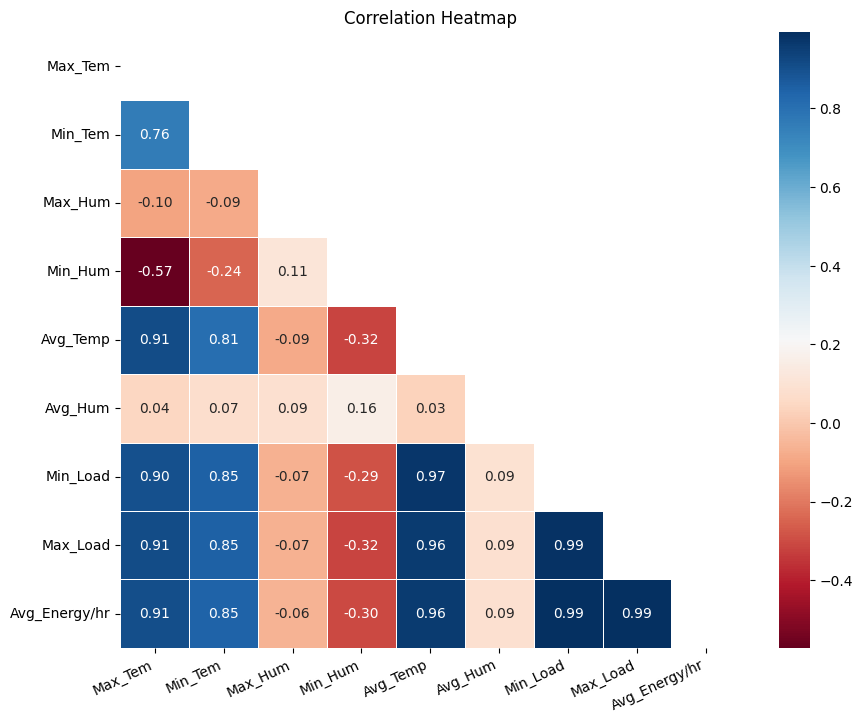

In [61]:
# Extract numerical columns for correlation
columns = ['Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 'Avg_Temp', 'Avg_Hum', 
                     'Min_Load', 'Max_Load', 'Avg_Energy/hr']

correlation_matrix = df[columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, mask=mask)

plt.xticks(rotation=25, ha='right')
plt.title('Correlation Heatmap')
plt.show()

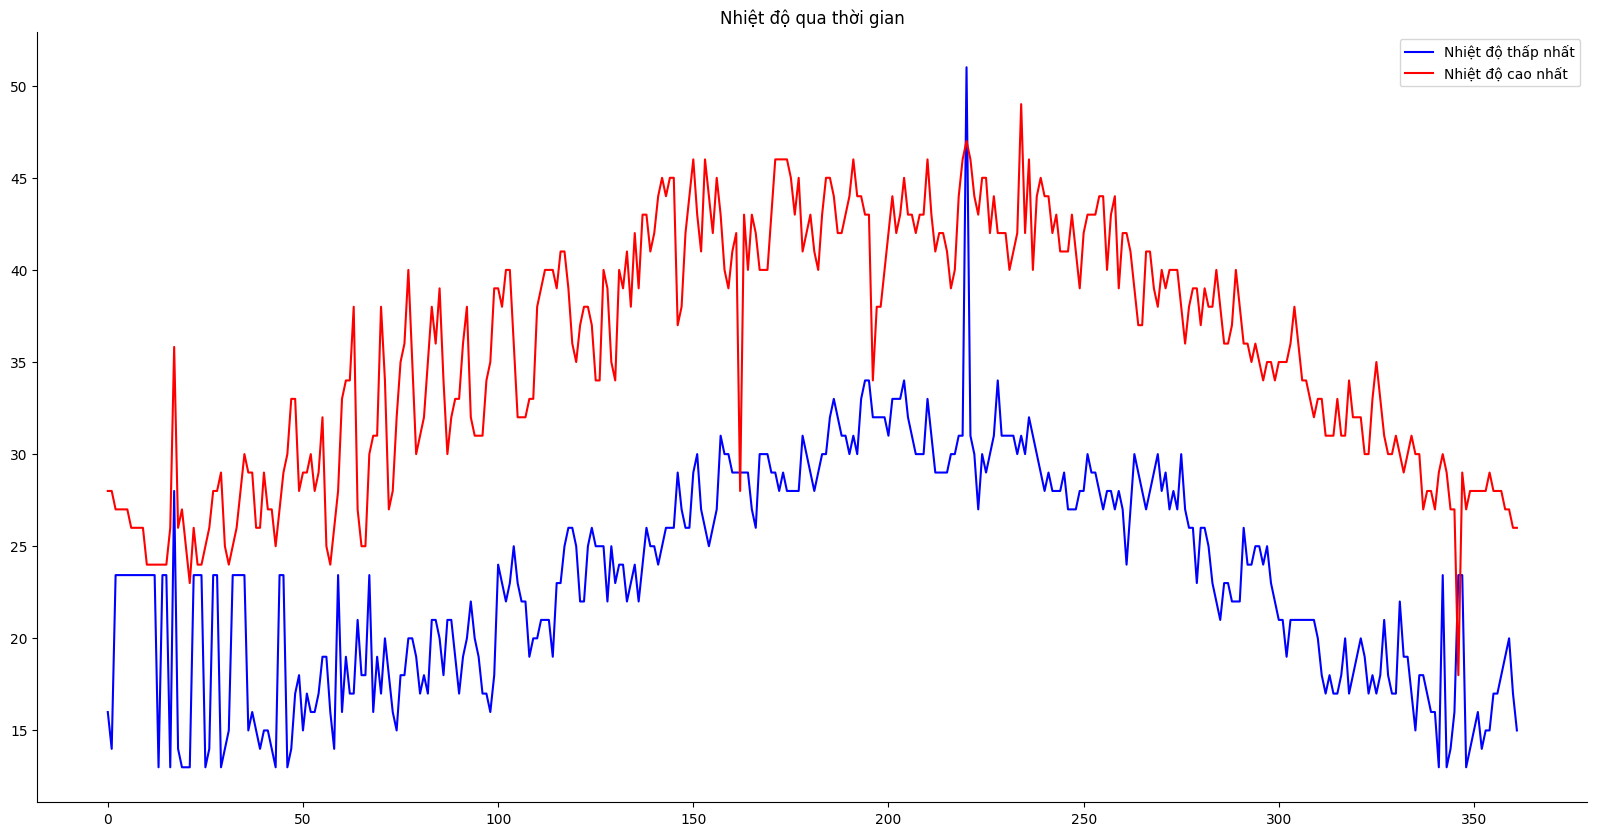

In [62]:
plt.figure(figsize=(20, 10))
df['Min_Tem'].plot(kind='line', title="Nhiệt độ qua thời gian", color='blue', label='Nhiệt độ thấp nhất')
df['Max_Tem'].plot(kind='line', color='red', label='Nhiệt độ cao nhất')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

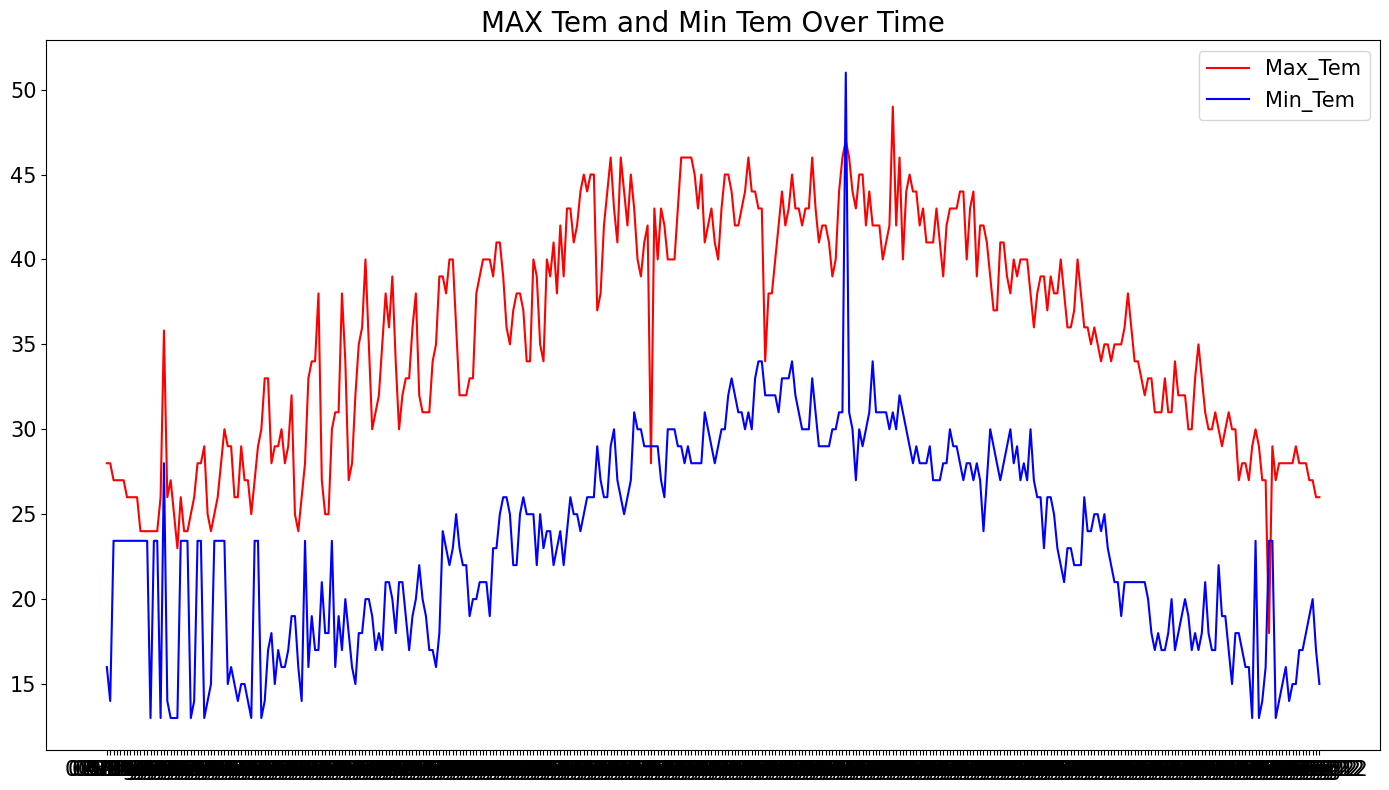

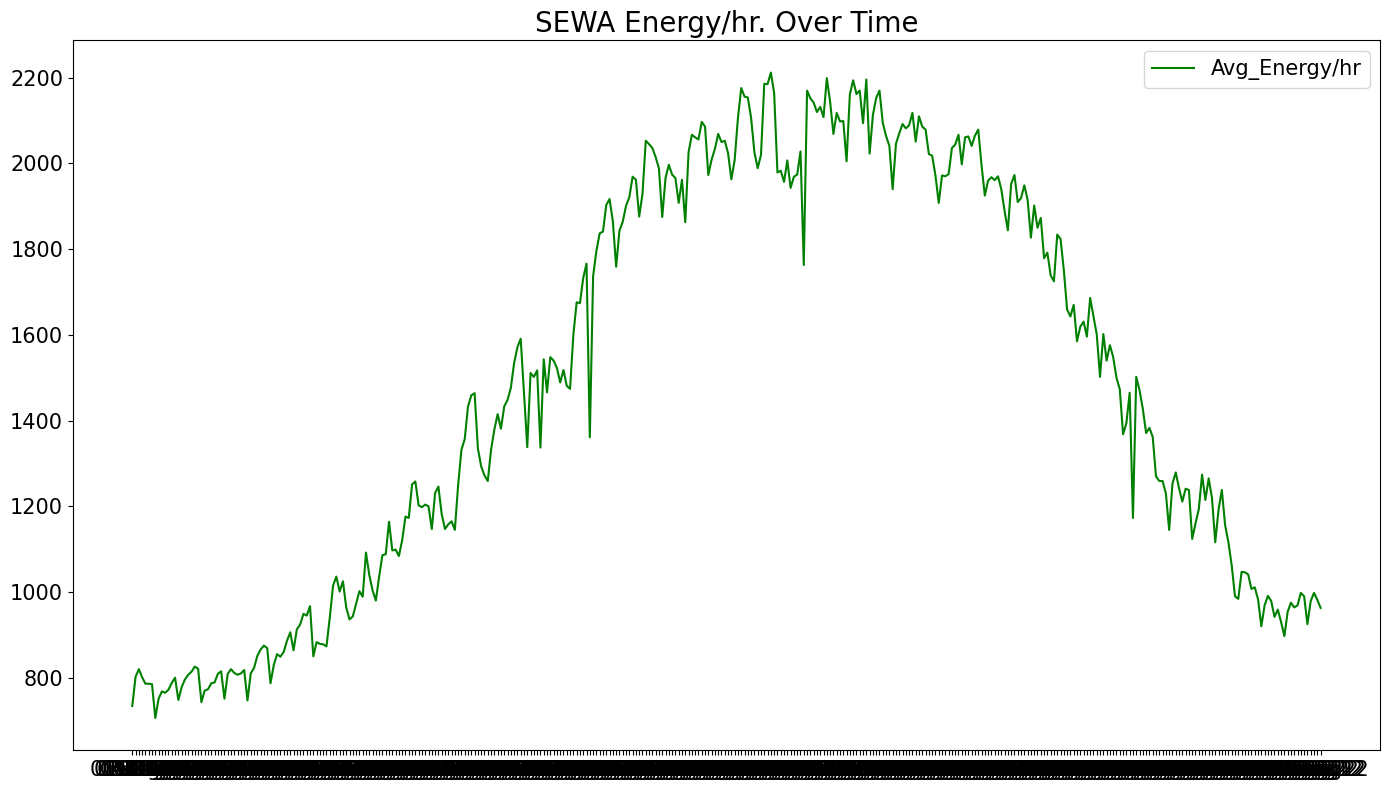

In [63]:
plot_data = df[['Date', 'Max_Tem', 'Min_Tem', 'Avg_Energy/hr']]

# Set the Date column as the index for plotting
plot_data.set_index('Date', inplace=True)

# Plot MAX Tem and Min Tem on a separate line chart
plt.figure(figsize=(14, 8))
plt.plot(plot_data.index, plot_data['Max_Tem'], label='Max_Tem', color='red')
plt.plot(plot_data.index, plot_data['Min_Tem'], label='Min_Tem', color='blue')

plt.xlabel('')
plt.ylabel('')
plt.title('MAX Tem and Min Tem Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

# Plot SEWA Energy/hr. on a separate line chart
plt.figure(figsize=(14, 8))
plt.plot(plot_data.index, plot_data['Avg_Energy/hr'], label='Avg_Energy/hr', color='green')

plt.xlabel('')
plt.ylabel('')
plt.title('SEWA Energy/hr. Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

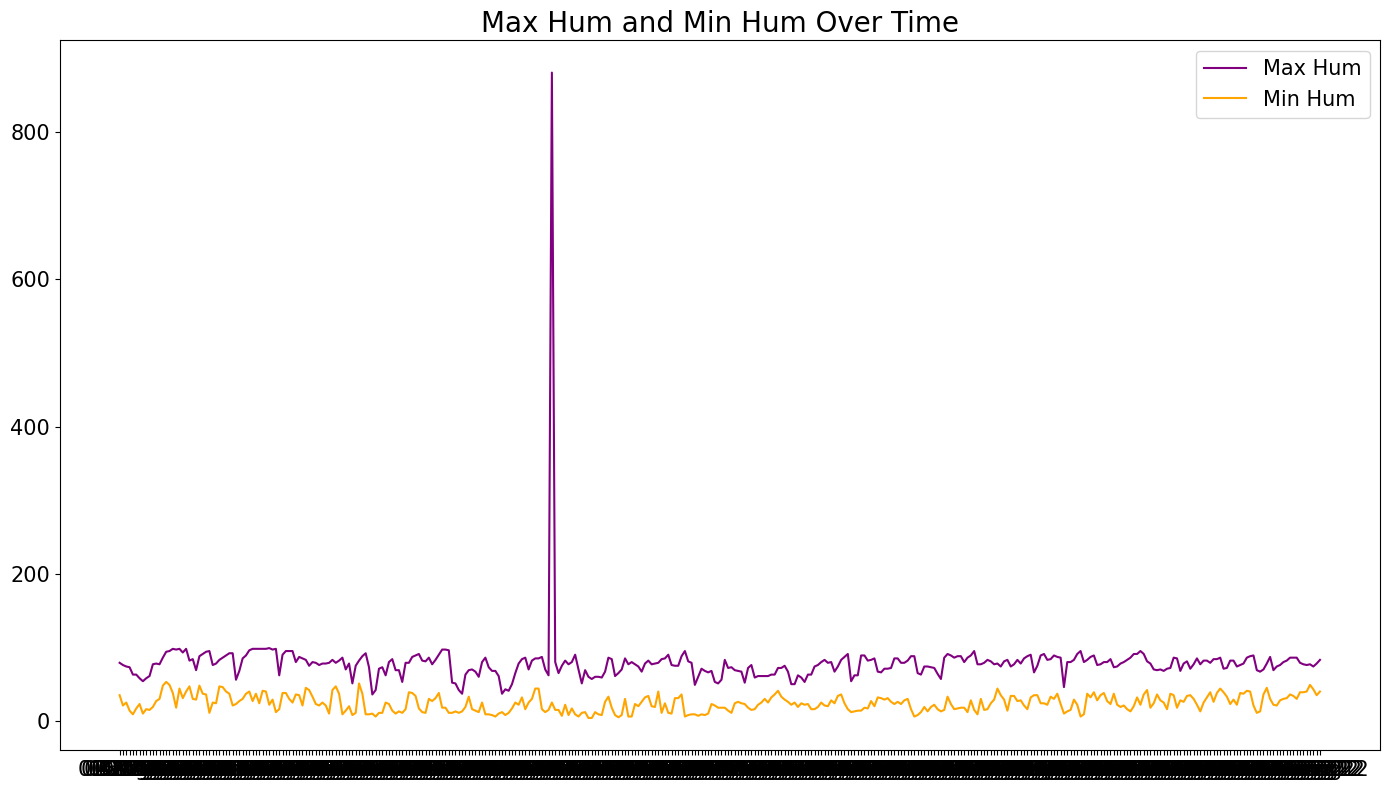

In [64]:
humidity_data = df[['Date', 'Max_Hum', 'Min_Hum']]

humidity_data.set_index('Date', inplace=True)

# Plot Max Hum and Min Hum on a line chart
plt.figure(figsize=(14, 8))
plt.plot(humidity_data.index, humidity_data['Max_Hum'], label='Max Hum', color='purple')
plt.plot(humidity_data.index, humidity_data['Min_Hum'], label='Min Hum', color='orange')

plt.xlabel('')
plt.ylabel('')
plt.title('Max Hum and Min Hum Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

In [65]:
outlier_value = df['Max_Hum'].max()
outlier_row = df[df['Max_Hum'] == outlier_value]

outlier_row

,Date,Day,Max_Tem,Min_Tem,Max_Hum,Min_Hum,Avg_Temp,Avg_Hum,Min_Load,Max_Load,Avg_Energy/hr
130,11-Thg5,Tuesday,34.0,23.0,881,25,27,60,1266.0,1661,1489.0


In [66]:
date_range = pd.date_range(start='2021-05-09', end='2021-05-13')
data_around_outlier = df[df['Date'].isin(date_range)]

data_around_outlier

,Date,Day,Max_Tem,Min_Tem,Max_Hum,Min_Hum,Avg_Temp,Avg_Hum,Min_Load,Max_Load,Avg_Energy/hr


In [67]:
df['Max_Hum'].replace(881, 81, inplace=True)

df[df['Date'] == '2021-05-11']

,Date,Day,Max_Tem,Min_Tem,Max_Hum,Min_Hum,Avg_Temp,Avg_Hum,Min_Load,Max_Load,Avg_Energy/hr


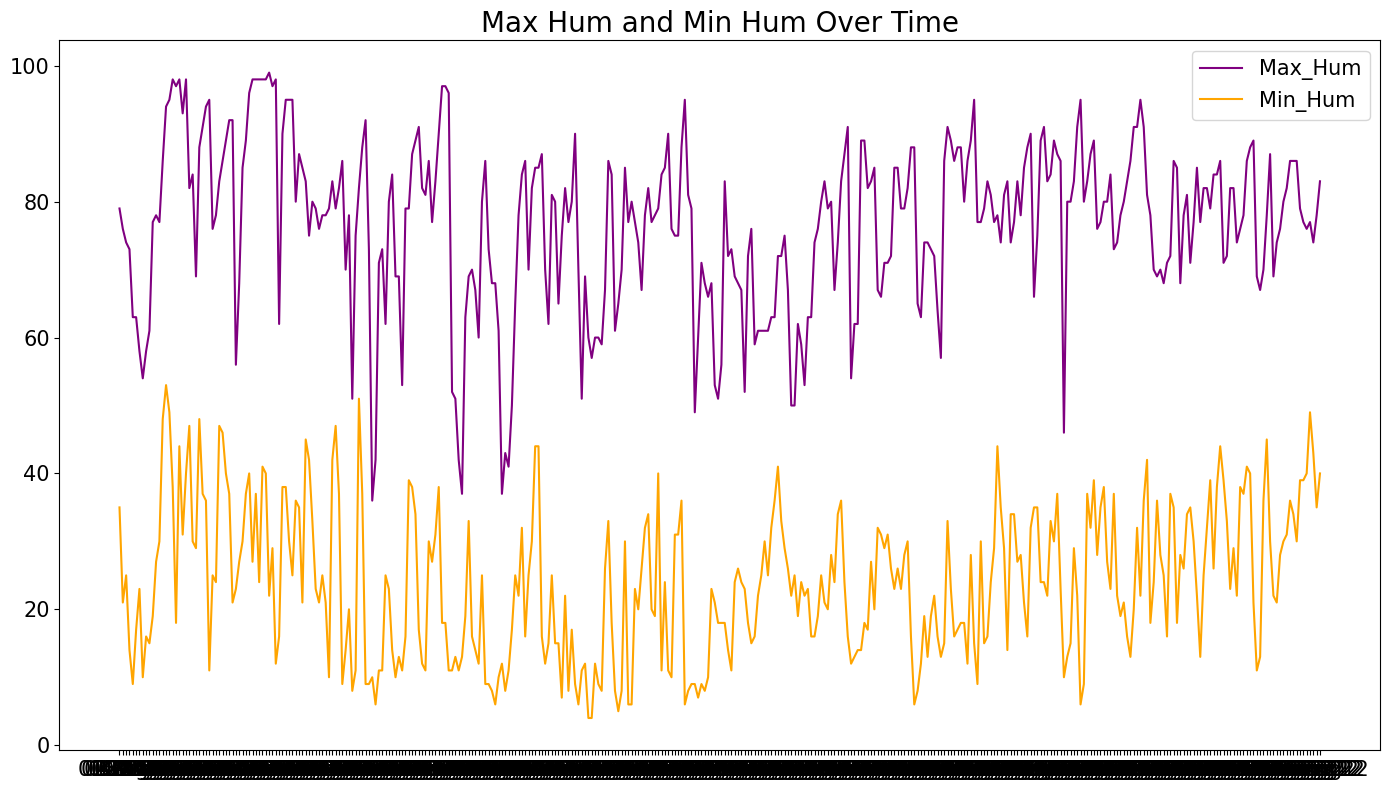

In [68]:
humidity_data = df[['Date', 'Max_Hum', 'Min_Hum']]

humidity_data.set_index('Date', inplace=True)

# Plot Max Hum and Min Hum on a line chart
plt.figure(figsize=(14, 8))
plt.plot(humidity_data.index, humidity_data['Max_Hum'], label='Max_Hum', color='purple')
plt.plot(humidity_data.index, humidity_data['Min_Hum'], label='Min_Hum', color='orange')

plt.xlabel('')
plt.ylabel('')
plt.title('Max Hum and Min Hum Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

## Huấn luyện mô hình


In [69]:
from datetime import datetime

# Chuỗi thời gian cần chuyển đổi
time_str = "01-Thg1"

# Định dạng của chuỗi thời gian
time_format = "%d-Thg%m"

# Chuyển đổi chuỗi thời gian thành đối tượng datetime
time_obj = datetime.strptime(time_str, time_format)

In [70]:
# trích xuất tháng từ cột ngày
df['Month'] = pd.to_datetime(df['Date'], format='%d-Thg%m').dt.month
# phân loại tháng thành 4 mùa
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

df['Season'] = df['Month'].map(season_map)
# bỏ cột ngày và tháng, vì cột mùa đã được trích xuất từ ​​chúng
df.drop(['Date','Month'],axis=1,inplace=True) 

In [71]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Khởi tạo OneHotEncoder mà không sử dụng đối số sparse
encoder = OneHotEncoder()

# Mã hóa cột “Ngày” và “Mùa”
encoded_data = encoder.fit_transform(df[['Day', 'Season']])

# Tạo DataFrame với dữ liệu được mã hóa
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Day', 'Season']))

# Ghép nối DataFrame gốc với DataFrame được mã hóa
df_encoded = pd.concat([df, encoded_df], axis=1)

# Xóa các cột "Ngày" và "Mùa" từ DataFrame đã mã hóa
df_encoded.drop(['Day','Season'], axis=1, inplace=True)

print(df_encoded)


     Max_Tem    Min_Tem  Max_Hum  Min_Hum  Avg_Temp  Avg_Hum  Min_Load  \
0       28.0  16.000000       79       35        19       50     652.0   
1       28.0  14.000000       76       21        19       42     643.0   
2       27.0  23.432432       74       25        20       36     682.0   
3       27.0  23.432432       73       14        17       16     653.0   
4       27.0  23.432432       63        9        16       13     647.0   
..       ...        ...      ...      ...       ...      ...       ...   
357     28.0  18.000000       76       40        21       47     797.0   
358     27.0  19.000000       77       49        21       53     813.0   
359     27.0  20.000000       74       43        24       40     877.0   
360     26.0  17.000000       78       35        24       32     862.0   
361     26.0  15.000000       83       40        20       57     817.0   

     Max_Load  Avg_Energy/hr  Day_Friday  Day_Monday  Day_Saturday  \
0         812          734.0         1.0 

In [72]:
# khi đưa ra tất cả giá trị tối thiểu, tối đa và trung bình cho mục tiêu dự báo
# X = df_encoded.drop('Avg_Energy/hr',axis=1)
# y = df_encoded['Avg_Energy/hr']

#không đưa ra nhu cầu năng lượng tối thiểu, tối đa và trung bình cho mục tiêu dự báo
X = df_encoded.drop(['Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 
                    'Min_Load', 'Max_Load', 'Avg_Energy/hr'],axis=1)
y = df_encoded['Avg_Energy/hr']


# khi chỉ đưa ra nhiệt độ trung bình và âm lượng trung bình cho mục tiêu dự báo
# X = df_encoded.drop(['Avg_Energy/hr','Min_Load', 'Max_Load'],axis=1)
# y = df_encoded['Avg_Energy/hr']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

### XGBoost

In [73]:
#initializing empty lists to store model performance
model_name = []
model_rmse = []
model_r2 = []

#creating standard scaler object
scaler = StandardScaler()

# Tạo đường ống với bộ chia tỷ lệ và XGBoostRegressor
pipe = make_pipeline(scaler, XGBRegressor(random_state=42))

#xác định phạm vi siêu tham số để điều chỉnh
param_grid = {
    'xgbregressor__n_estimators': [50, 100, 150], #số vòng tăng tốc
    'xgbregressor__learning_rate': [0.05, 0.1, 0.2],  #tỷ lệ học
    'xgbregressor__max_depth': [3, 4, 5],  #độ sâu tối đa của cây
    'xgbregressor__gamma': [0, 0.1, 0.2]  #cần giảm tổn thất tối thiểu cho phân vùng tiếp theo
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE", mse)
print("R2", r2) 

model_name.append('XGb')
model_rmse.append(mse)
model_r2.append(r2)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


RMSE: 84.4155685000387
MAE: 66.07904052734375
MSE 7125.988205184726
R2 0.9700930240506697
Best Parameters: {'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 100}


### Arima

In [74]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model = auto_arima(y_train, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, 
                         start_P=0, 
                         seasonal=False,
                         d=None, 
                         D=0,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print(ARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5077.231, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4566.808, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4865.566, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4509.068, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4475.073, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4392.430, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4390.491, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4389.122, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4387.464, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4389.089, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4391.088, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.216 seconds
                               S

In [75]:
arima = ARIMA(y_train, order=(0,0,1)).fit()
predictions = arima.forecast(steps=len(y_test))
print(predictions)

289    1499.196772
290    1500.975779
291    1500.975779
292    1500.975779
293    1500.975779
          ...     
357    1500.975779
358    1500.975779
359    1500.975779
360    1500.975779
361    1500.975779
Name: predicted_mean, Length: 73, dtype: float64


c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [76]:
mse = mean_squared_error(y_test, predictions, squared=False)

print("Root Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, predictions,squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE", mse)
print("R2", r2) 

Root Mean Squared Error: 495.94958427948313
RMSE: 495.94958427948313
MAE: 452.69128948611217
MSE 245965.99014699215
R2 -0.03229176640050646


## SARIMA

Number of columns: 11
Column names: Index(['Date', 'Day', 'MAX Tem', 'Min Tem', 'Max Hum', 'Min Hum', 'Temp',
       'Hum', 'SEWA MIN LOAD(MW)', 'SEWA Peak Load(MW)', 'SEWA Energy/hr.'],
      dtype='object')
           Day Max_Tem   Min_Tem Max_Hum Min_Hum  Temp  Hum  SEWA_MIN_LOAD_MW  \
Date                                                                            
NaT     Friday    28 C      16 C     79%     35%  19 C  50%             652.0   
NaT   Saturday    28 C      14 C     76%     21%  19 C  42%             643.0   
NaT     Sunday    27 C  12:00 CH     74%     25%  20 C  36%             682.0   
NaT     Monday    27 C  12:00 CH     73%     14%  17 C  16%             653.0   
NaT    Tuesday    27 C  10:00 CH     63%      9%  16 C  13%             647.0   

      SEWA_Peak_Load_MW  SEWA_Energy_hr  
Date                                     
NaT                 812           734.0  
NaT                 936           802.0  
NaT                 949           820.0  
NaT          

c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                                     SARIMAX Results                                      
Dep. Variable:                     SEWA_Energy_hr   No. Observations:                  363
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2048.153
Date:                            Sun, 16 Jun 2024   AIC                           4106.306
Time:                                    19:35:43   BIC                           4125.596
Sample:                                         0   HQIC                          4113.984
                                            - 363                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3682      0.091      4.044      0.000       0.190       0.547
ma.L1         -0.7642      0.068   

c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


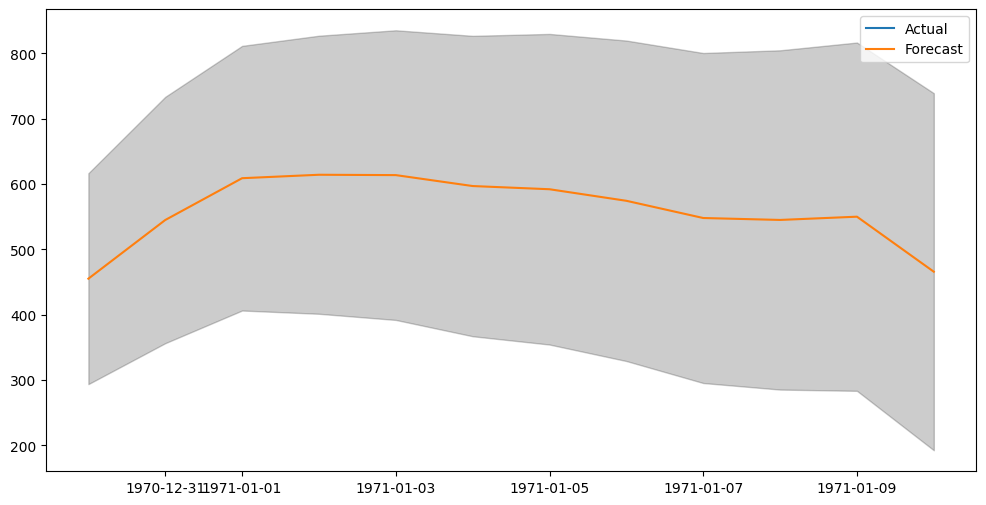

In [77]:

# Đọc dữ liệu từ tệp CSV với dấu phân cách là dấu chấm phẩy
data = pd.read_csv('./SEWA_energy.csv', delimiter=';')

# In ra số lượng cột và tên cột
print("Number of columns:", len(data.columns))
print("Column names:", data.columns)

# Đổi tên các cột cho dễ xử lý (đảm bảo số lượng tên cột khớp với số lượng cột thực tế)
# Nếu số lượng cột là 11, bạn cần thêm tên cột thứ 11
data.columns = ['Date', 'Day', 'Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 'Temp', 'Hum', 'SEWA_MIN_LOAD_MW', 'SEWA_Peak_Load_MW', 'SEWA_Energy_hr']

# Chuyển đổi cột 'Date' sang định dạng datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b', errors='coerce', dayfirst=True)
data['Date'] = data['Date'].fillna(method='ffill')  # Điền giá trị bị thiếu

# Đặt cột 'Date' làm chỉ số
data.set_index('Date', inplace=True)

# Loại bỏ ký tự không mong muốn từ tên cột (nếu có)
data.columns = data.columns.str.strip()

# Chuyển đổi cột 'SEWA_Energy_hr' sang kiểu số
data['SEWA_Energy_hr'] = pd.to_numeric(data['SEWA_Energy_hr'], errors='coerce')

# Bỏ các hàng có giá trị NaN trong cột 'SEWA_Energy_hr'
data.dropna(subset=['SEWA_Energy_hr'], inplace=True)

# Hiển thị dữ liệu đã được làm sạch
print(data.head())

# Xây dựng mô hình SARIMA
model = sm.tsa.statespace.SARIMAX(data['SEWA_Energy_hr'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# In tóm tắt của mô hình
print(results.summary())

# Dự báo
forecast = results.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(data['SEWA_Energy_hr'], label='Actual')
plt.plot(forecast_df['forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán dự báo
forecast_values = forecast_df['forecast'].values

# Tính toán dữ liệu thực tế
actual_values = data['SEWA_Energy_hr'].values[-len(forecast_values):]

# Tính toán RMSE và MAE
rmse = mean_squared_error(actual_values, forecast_values, squared=False)
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
r2 = r2_score(actual_values, forecast_values)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE", mse)
print("R2", r2) 

RMSE: 402.73310022292947
MAE: 399.97839024056367
MSE 162193.95001517216
R2 -1.9021900570219197


## LSTM

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Đọc và xử lý dữ liệu
df = pd.read_csv('./SEWA_energy.csv', encoding='latin-1', sep=";")

# Đổi tên các cột để dễ sử dụng
new_column_names = ['Date', 'Day', 'Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 
                    'Avg_Temp', 'Avg_Hum', 'Min_Load', 'Max_Load', 'Avg_Energy/hr']
df.columns = new_column_names

# Chuyển đổi cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b', errors='coerce', dayfirst=True)
df['Date'] = df['Date'].fillna(method='ffill')  # Điền giá trị bị thiếu

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Xóa các giá trị NaN
df.dropna(inplace=True)

# Chỉ lấy cột 'Avg_Energy/hr' cho mô hình LSTM
dataset = df['Avg_Energy/hr'].values
dataset = dataset.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Định hình lại đầu vào để nó có thể được [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [80]:
# Tạo và huấn luyện mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)


c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
287/287 - 4s - 15ms/step - loss: 0.0626
Epoch 2/10
287/287 - 1s - 2ms/step - loss: 0.0034
Epoch 3/10
287/287 - 0s - 2ms/step - loss: 0.0033
Epoch 4/10
287/287 - 0s - 2ms/step - loss: 0.0034
Epoch 5/10
287/287 - 0s - 2ms/step - loss: 0.0031
Epoch 6/10
287/287 - 1s - 2ms/step - loss: 0.0030
Epoch 7/10
287/287 - 1s - 2ms/step - loss: 0.0028
Epoch 8/10
287/287 - 1s - 3ms/step - loss: 0.0028
Epoch 9/10
287/287 - 1s - 3ms/step - loss: 0.0029
Epoch 10/10
287/287 - 1s - 3ms/step - loss: 0.0025


In [81]:
# Dự báo trên tập kiểm tra
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Đưa dữ liệu về dạng ban đầu
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Tính toán RMSE
trainScore_LSTM = np.sqrt(np.mean((trainPredict[:,0] - trainY[0]) ** 2))
testScore_LSTM = np.sqrt(np.mean((testPredict[:,0] - testY[0]) ** 2))
print('Train Score: %.2f RMSE' % (trainScore_LSTM))
print('Test Score: %.2f RMSE' % (testScore_LSTM))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train Score: 84.92 RMSE
Test Score: 73.09 RMSE


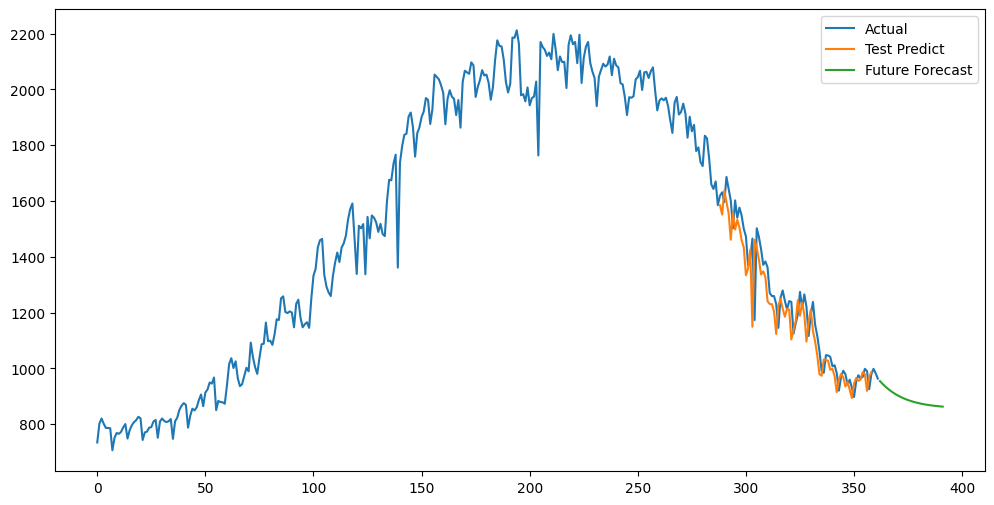

In [82]:
# Dự báo tương lai
look_ahead = 30
x_input = test[-look_back:]
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = look_back
i = 0
while(i < look_ahead):
    if(len(temp_input) > look_back):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, 1, look_back))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, 1, look_back))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1

# Chuyển đổi dự báo về dạng ban đầu
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(df['Avg_Energy/hr'].values, label='Actual')
plt.plot(range(len(trainPredict) + look_back, len(trainPredict) + look_back + len(testPredict)), testPredict, label='Test Predict')
plt.plot(range(len(dataset), len(dataset) + look_ahead), lst_output, label='Future Forecast')
plt.legend()
plt.show()


## CNN

Epoch 1/10


c:\Users\Nctha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


285/285 - 2s - 7ms/step - loss: 0.0177
Epoch 2/10
285/285 - 1s - 2ms/step - loss: 0.0027
Epoch 3/10
285/285 - 1s - 2ms/step - loss: 0.0028
Epoch 4/10
285/285 - 1s - 3ms/step - loss: 0.0025
Epoch 5/10
285/285 - 1s - 2ms/step - loss: 0.0027
Epoch 6/10
285/285 - 1s - 2ms/step - loss: 0.0025
Epoch 7/10
285/285 - 0s - 2ms/step - loss: 0.0026
Epoch 8/10
285/285 - 0s - 2ms/step - loss: 0.0025
Epoch 9/10
285/285 - 0s - 2ms/step - loss: 0.0028
Epoch 10/10
285/285 - 0s - 2ms/step - loss: 0.0026
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 71.16 RMSE
Test Score: 77.61 RMSE


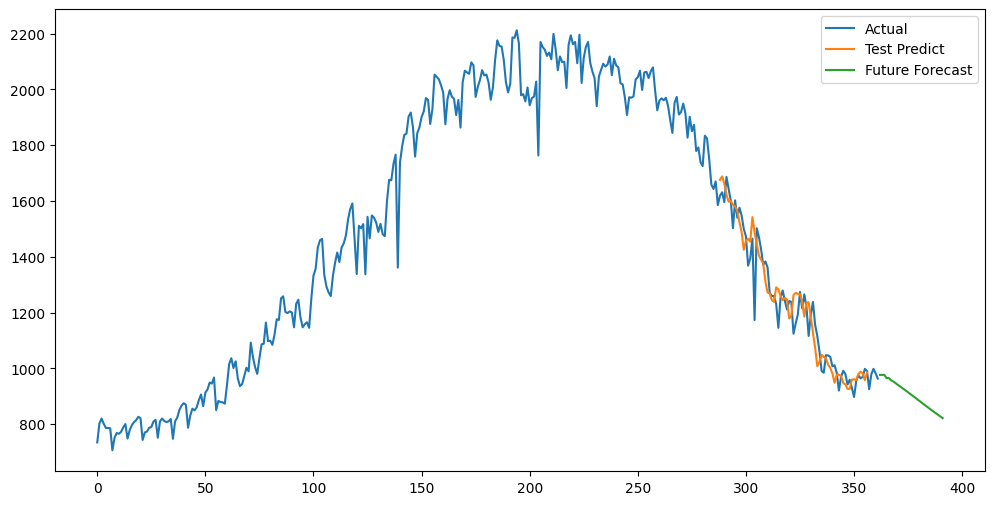

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

# Đọc và xử lý dữ liệu
df = pd.read_csv('./SEWA_energy.csv', encoding='latin-1', sep=";")

# Đổi tên các cột để dễ sử dụng
new_column_names = ['Date', 'Day', 'Max_Tem', 'Min_Tem', 'Max_Hum', 'Min_Hum', 
                    'Avg_Temp', 'Avg_Hum', 'Min_Load', 'Max_Load', 'Avg_Energy/hr']
df.columns = new_column_names

# Chuyển đổi cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b', errors='coerce', dayfirst=True)
df['Date'] = df['Date'].fillna(method='ffill')  # Điền giá trị bị thiếu

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Xóa các giá trị NaN
df.dropna(inplace=True)

# Chỉ lấy cột 'Avg_Energy/hr' cho mô hình CNN
dataset = df['Avg_Energy/hr'].values
dataset = dataset.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Sử dụng look_back=3
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Định hình lại đầu vào để nó có thể là [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Tạo và huấn luyện mô hình CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Dự báo trên tập kiểm tra
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Đưa dữ liệu về dạng ban đầu
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Tính toán RMSE
trainScore_CNN = np.sqrt(np.mean((trainPredict[:,0] - trainY[0]) ** 2))
testScore_CNN = np.sqrt(np.mean((testPredict[:,0] - testY[0]) ** 2))
print('Train Score: %.2f RMSE' % (trainScore_CNN))
print('Test Score: %.2f RMSE' % (testScore_CNN))

# Dự báo tương lai
look_ahead = 30
x_input = test[-look_back:]
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = look_back
i = 0
while(i < look_ahead):
    if(len(temp_input) > look_back):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, look_back, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, look_back, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1

# Chuyển đổi dự báo về dạng ban đầu
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(df['Avg_Energy/hr'].values, label='Actual')
plt.plot(range(len(trainPredict) + look_back, len(trainPredict) + look_back + len(testPredict)), testPredict, label='Test Predict')
plt.plot(range(len(dataset), len(dataset) + look_ahead), lst_output, label='Future Forecast')
plt.legend()
plt.show()


# Đánh giá mô hình

In [84]:
print("RMSE LSTM: ", trainScore_LSTM)
print("RMSE SARIMA: ", rmse)
print("RMSE CNN: ", trainScore_CNN)

RMSE LSTM:  84.92196182917208
RMSE SARIMA:  402.73310022292947
RMSE CNN:  71.15719965448575
